## Types of Resnet 
- ResNet-18
- ResNet-34
- `ResNet-50 -- Done (accuracy: __.__%)`
- ResNet-101
- ResNet-152
- ResNet-164
- ResNet-1202

---
- use ImageDataGenerator and 
- split for training and validation 

---
---

\begin{align}
         THEORY
    \end{align}
Lets say,

\begin{align}
    imagesize = 300, 300, 3
    \end{align}
And the architecture of resnet50 is:

<!-- ![Resnet 50 Architecture](https://cdn-5f733ed3c1ac190fbc56ef88.closte.com/wp-content/uploads/2019/07/ResNet50_architecture-1.png) or -->

![Resnet50 Architecture](https://miro.medium.com/max/1400/0*9LqUp7XyEx1QNc6A.png)

---

The **FIRST LAYER** of on the resnet:
```
convolution + batch normalization + max pooling where,
filter size = 7 * 7, and 64 such filters
stride = 2
padding = 3 
```
---
The Formula for calculating the shape of output

\begin{align}
        \frac{n + 2P - f}{s} +1 * \frac{n + 2P - f}{s} +1 * {outputchannel} 
    \end{align}

---

**EXAMPLE**
```
imagesize = 300, 300, 3

n = 300
f = 7
P = 3
outputchaannel = 64
stride = 2
``` 
\begin{align}
        \frac{300 + 2 (3) - 7}{2} +1 * \frac{300 + 2 (3) - 7}{2} +1 * {outputchannel} 
    \end{align}

that is:
```
output size = 150 * 150 * 64 
```

```
## NOTE: Stride 2 means we have to reduce the size of the image without using the pooling layer.
```
---
The next layer is **max pool** layer
```
n = 150 (output of previous layer)
f = 3
P = 1 (not given therefore one)
outputchannel = 64 (not given then same as previous)
stride = 2
```
\begin{align}
        \frac{150 + 2(1) - 3}{2} +1 * \frac{150 + 2(1) - 3}{2} +1 * {output channel} 
    \end{align}

that is:
```
output size = 75 * 75 * 64
```
and so on...



---
---

\begin{align}
        Identity\ Block\ (Input\ size == Output\ size)
    \end{align}

![Both Blocks](https://www.researchgate.net/profile/Antonio-Theophilo/publication/321347448/figure/fig2/AS:565869411815424@1511925189281/Bottleneck-Blocks-for-ResNet-50-left-identity-shortcut-right-projection-shortcut.png)

---
---
\begin{align}
        Convolution\ Block\ (Input\ Size\ != Output\ Size)
      \end{align}

So what happens is whenever the input size and the output size are the same then we can add the input X directly to the output but if the input size is not equal to the output size then we can not add the input X in the output so thats why we use convolution block to bacially make the input and output sizes same.

---
Lets say that:
```
input size = 56, 56, 64
and the output size = 28, 28, 128
```  

There are two options for *matching the output size*,

- Padding the input volume
- Perform 1*1 convolutions

```
So. bacially we use the same method we create a convolution block of 1*1 with no padding
and strids as 2
```
\begin{align}
    \frac{n + 2*P - f}{s} +1 * \frac{n + 2*P - f}{s}
    \end{align}

so,
```
as input size = 56, 56, 64
output size = 28, 28, 128
padding = 0 and
strides = 2
f = 1
```
\begin{align}
    \frac{56 + 2*0 - 1}{2} +1 * \frac{56 + 2*0 - 1}{2}
    \end{align}

which will give us 28 * 28 as the output size

In [ ]:
import tensorflow as tf
# tf.test.gpu_device_name()


In [ ]:
from tensorflow.python.client import device_lib
# device_lib.list_local_devices()

In [ ]:
# Mount G-Drive 
from google.colab import drive
import time

def mountGDrive():
  print("[INFO] Mounting google drive to this notebook.")
  drive.mount('/content/gdrive')
  print("\n-------------------------------\n[DONE] G-Drive Mount Successful\n-------------------------------")


In [ ]:
# mountGDrive()

In [ ]:
def unzipFiles():
  print("[INFO] Unzipping the dataset from google drive.")
  %time !unzip -q gdrive/My\ Drive/Cloud\ Research/dataset/data.zip
  print("-------------------------------\n[DONE] Unzip Successful\n-------------------------------")


In [ ]:
# !unzip test1.zip

In [ ]:
def unzipTrainData():
  print(f"[INFO] Unzipping Training Data")
  %time !unzip -q train.zip
  print("-------------------------------\n[DONE] Unzipping Training Data Successful\n-------------------------------")


In [ ]:
# def unzipTestData():
#   print(f"[INFO] Unzipping Testing Data")
#   %time !unzip -q test1.zip
#   print("-------------------------------\n[DONE] Unzipping Testing Data Successful\n-------------------------------")

In [ ]:
# import pandas as pd
# new = pd.read_csv()

In [ ]:
import os
# path = 'train'
# print(f'Total number of training data: {len(os.listdir(path))}')

In [ ]:
def createCommonList(path):
  print("[INFO] Creating common List")
  commonList = []
  %time
  for i in os.listdir(path):
    commonList.append(i)
  print("-------------------------------\n[DONE] Common List creation Successful\n-------------------------------")
  return commonList
# commonList[0] # dog.21.jpg <-- output
# commonList[12].split('.')[0] # dog <-- output

In [ ]:

def createFinalList(commonList, path):
  print("[INFO] Creating Final Train List")
  final_train_list = []
  %time
  for i in commonList:
    final_train_list.append((i.split('.')[0], path+'/'+i))
  print(f'\nFirst element: {final_train_list[0]}\n')
  print("-------------------------------\n[DONE] Final Test List Creation Successful\n-------------------------------")
  return final_train_list

In [ ]:
# Testing spliting data
# mountGDrive()
# unzipFiles()
# unzipTrainData()
# commonList = createCommonList('train')
# finalList = createFinalList(commonList, 'train')


In [ ]:

def splitData(ftl):
  train_dog_list = []
  train_list = []
  train_cat_list = []
  i = 0
  j = 0
  while len(train_dog_list) < 5000:
    if ftl[i][0] == 'dog':
      train_dog_list.append(('dog', ftl[i][1]))
      ftl.remove(ftl[i])
      # print(f'len of dog list: {len(train_dog_list)}')
    else:
      if (len(train_cat_list) != 5000):
        train_cat_list.append(('cat', ftl[i][1]))
        ftl.remove(ftl[i])
      # print(f'len of cat list: {len(train_cat_list)}')
    i += 1
    
  train_list = train_dog_list + train_cat_list
  return train_list, ftl

In [ ]:

import pandas as pd
def createDataFrame(final_train_list):
  train_df = pd.DataFrame(final_train_list, columns=['pet_type', 'image'])
  train_df.head()
  return train_df

In [ ]:
# new = new.drop(172)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def plotAnyImage(train_df, index):
  plt.imshow(mpimg.imread(train_df['image'][index]))

In [ ]:



def generalInfoAboutDAtaFrame(train_df):
  print(f'Total numner of images in dataset: {len(train_df)}')
  pet_count = train_df['pet_type'].value_counts()
  print(f'Pets in Each Category:\n{pet_count}')

In [ ]:

import cv2

def imagesAndLabelsFormater(train_df):
  labels = []
  images = []

  im_size = 224

  for i in train_df['pet_type']:
    labels.append(i)

  for i in range(len(train_df)):
    # print(i)
    print(f'[INFO] Processing image {str(len(images))} of {str(len(train_df))}')
    img = cv2.imread(train_df['image'][i])
    img2 = cv2.resize(img, (224, 224))
    images.append(img2)
  print('[DONE] All images uploaded and resized.')
  return images, labels

In [ ]:
# labels
# print(f'[INFO] Images shape: {images[0].shape}')

In [ ]:
import numpy as np

def convertIntoArray(images):
  images = np.array(images)
  print(f'[INFO] Processed images shape: {images.shape}')
  return images

In [ ]:
# print('[INFO] D')
# imag1 = images[0].astype('float32') / 255.0
# imag1.shape

In [ ]:
# images[0:13650][-1]

In [ ]:

# final_images = []
# for i in range(len(images[0:13650])):
#   print(i)
#   img1 = images[i].astype('float32') / 255.0
#   final_images.append(img1)

In [ ]:

# for i in range(len(images[13650:])):
#   print(i)
#   img1 = images[i].astype('float32') / 255.0
#   final_images.append(img1)

In [ ]:
# images[0]

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

def custom_data_label_encoder(y_labels):
  y = y_labels  # cat, cat, dog, cat, dog...
  y_labelEncoder = LabelEncoder()
  y = y_labelEncoder.fit_transform(y)  
  y = y.reshape(-1, 1)
  onehotencorder = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), [0])],
    remainder='passthrough'                     
  )
  return onehotencorder.fit_transform(y)

# Y = custom_data_label_encoder(train_df['pet_type'].values)
# Y[0] # array([1., 0.]) <-- Output
# print(f'[INFO] Encoded Label shape: {Y.shape}')

In [ ]:


# from sklearn.utils import shuffle
# from sklearn.model_selection import train_test_split

# images, Y = shuffle(images, Y, random_state=1)

# train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.08, random_state=415)

In [ ]:

# test_x.shape

In [ ]:

import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
# from IPython.display import svg
from keras.utils.vis_utils import model_to_dot, plot_model

from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow


In [ ]:
class RESNET34():
  def identity_layer(self, X, f, filters):
    F1, F2 = filters

    X_original = X

    #first layer
    X = Conv2D(filters = F1, kernel_size=(3,3), strides=(1,1), padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    # second layer
    X = Conv2D(filters = F2, kernel_size=(1,1), strides=(1,1), padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    X = Add()([X, X_original])
    X = Activation('relu')(X)

    return X

  def convolutional_block(self, X, f, filters, s=2):
    F1, F2 = filters

    X_original = X

    #first layer
    X = Conv2D(filters = F1, kernel_size=(3,3), strides=(1,1), padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    # second layer
    X = Conv2D(filters = F2, kernel_size=(1,1), strides=(1,1), padding='same')(X)
    X = BatchNormalization(axis=3)(X)


    # Shortcut path
    X_original = Conv2D(filters=F2, kernel_size=(1, 1), strides=(s, s), padding='same')(X_original)
    X_original = BatchNormalization(axis=3)(X_original)

    # Final Step is to add the initial input to the output function and then perform activation function for the final output
    X = Add()([X, X_original])
    X = Activation('relu')(X)

    return X

    # 34 = 3 4 6 3 ?
    # now = 3 4 4 2
    # https://www.analyticsvidhya.com/blog/2021/08/how-to-code-your-resnet-from-scratch-in-tensorflow/
    

  def runResnet34(self, input_shape=(224, 224, 3), classes = 2):
    X_input = Input(input_shape)

    # ZeroPadding
    X = ZeroPadding2D((3, 3))(X_input)

    # X.shape = (230, 230, 3)

    X = Conv2D(64, (7, 7), strides=(2, 2))(X) # layer 1
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X) # layer 2

    #stage 1
    X = self.convolutional_block(X, f=3, filters=[64, 64], s=1) # layer 3, 4
    X = self.identity_layer(X, f=3, filters=[64, 64]) # layer 5, 6
    X = self.identity_layer(X, f=3, filters=[64, 64]) # layer 7, 8

    #stage 2
    X = self.convolutional_block(X, f=3, filters=[128, 128], s=1) # layer 9, 10
    X = self.identity_layer(X, f=3, filters=[128, 128]) # layer 11, 12
    X = self.identity_layer(X, f=3, filters=[128, 128]) # layer 13, 14
    X = self.identity_layer(X, f=3, filters=[128, 128]) # layer 15, 16

    #stage 3
    X = self.convolutional_block(X, f=3, filters=[256, 256], s=1) # layer 17, 18
    X = self.identity_layer(X, f=3, filters=[256, 256]) # layer 19, 20
    X = self.identity_layer(X, f=3, filters=[256, 256]) # layer 21, 22
    X = self.identity_layer(X, f=3, filters=[256, 256]) # layer 23, 24
    X = self.identity_layer(X, f=3, filters=[256, 256]) # layer 25, 26
    X = self.identity_layer(X, f=3, filters=[256, 256]) # layer 27, 28

    #stage 4  

    X = self.convolutional_block(X, f=3, filters=[512, 512], s=1) # layer 29, 30
    X = self.identity_layer(X, f=3, filters=[512, 512]) # layer 31, 32
    X = self.identity_layer(X, f=3, filters=[512, 512]) # layer 33, 34


    # AVGPOOL
    X = AveragePooling2D((2, 2), name='avg_pool')(X)

    ################CODE END HERE################

    # Output layer
    X = Flatten()(X) # 2D or 3D image to 1D vector 
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer=glorot_uniform(seed=0))(X) 

    # Create Model
    model = Model(inputs=X_input, outputs=X, name='ResNet34')
    
    return model

In [ ]:
class RESNET():
  def identity_layer(self, X, f, filters):  
    F1, F2, F3 = filters # for first layer F1 = 64, F2 = 64, F3 = 256 according to the resnet50 Architecture

    X_original = X

    # First Layer
    X = Conv2D(filters = F1, kernel_size=(1, 1), strides=(1, 1), padding='valid')(X)
    # After every convolational layer we perform batch normalization
    X = BatchNormalization(axis=3)(X) # axis 3 means we are performing batch normalization on output channels therefore 3 coz its R, G, B
    # At the end we perform activation function
    X = Activation('relu')(X)
    ############################################

    # Second Layer
    X = Conv2D(filters = F2, kernel_size=(f, f), strides=(1, 1), padding='same')(X)   # f will be 3 according to the Architecture
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    ############################################

    # Third Layer
    X = Conv2D(filters = F3, kernel_size=(1, 1), strides=(1, 1), padding='valid')(X)   # f will be 3 according to the Architecture
    X = BatchNormalization(axis=3)(X)

    # Final Step is to add the initial input to the output function and then perform activation function for the final output
    X = Add()([X, X_original])
    X = Activation('relu')(X)

    return X

  def convolutional_block(self, X, f, filters, s=2):   
    F1, F2, F3 = filters

    X_original = X

    # First Layer
    X = Conv2D(F1, (1, 1), strides=(s, s), padding='valid')(X) # 1,1 is filter size
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    ############################################

    # Second Layer
    X = Conv2D(filters = F2, kernel_size=(f, f), strides=(1, 1), padding='same')(X)  
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    ############################################

    # Third Layer
    X = Conv2D(filters = F3, kernel_size=(1, 1), strides=(1, 1), padding='valid')(X)  
    X = BatchNormalization(axis=3)(X)

    # Shortcut path
    X_original = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid')(X_original)
    X_original = BatchNormalization(axis=3)(X_original)

    # Final Step is to add the initial input to the output function and then perform activation function for the final output
    X = Add()([X, X_original])
    X = Activation('relu')(X)

    return X
  
  def runResnet50(self, input_shape=(224, 224, 3), classes = 2):
    X_input = Input(input_shape)

    # ZeroPadding
    X = ZeroPadding2D((3, 3))(X_input)

    # X.shape = (230, 230, 3)

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2))(X) # layer 1
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X) # layer 2
    
    # X.shape = (55, 55, 64)

    # Stage 2
    X = self.convolutional_block(X, f=3, filters=[64, 64, 256], s=1) # layer 3, 4, 5 
    # X.shape = (55, 55, 256)
    X = self.identity_layer(X, f=3, filters=[64, 64, 256]) # layer 6, 7, 8
    X = self.identity_layer(X, f=3, filters=[64, 64, 256]) # layer 9, 10, 11
    # X.shape = (55, 55, 256)
    

    # Stage 3
    X = self.convolutional_block(X, f=3, filters=[128, 128, 512], s=2) # layer 12, 13, 14
    # X.shape = (28, 28, 512)
    X = self.identity_layer(X, f=3, filters=[128, 128, 512]) # layer 15, 16, 17
    # X.shape = (28, 28, 512)
    X = self.identity_layer(X, f=3, filters=[128, 128, 512]) # layer 18, 19, 20
    # X.shape = (28, 28, 512)
    X = self.identity_layer(X, f=3, filters=[128, 128, 512]) # layer 21, 22, 23
    # X.shape = (28, 28, 512)
    

    # Stage 4
    X = self.convolutional_block(X, f=3, filters=[256, 256, 1024], s=2) # layer 24, 25, 26
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 27, 28, 29
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 30, 31, 32
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 33, 34, 35
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 36, 37, 38
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)

    # Stage 5
    X = self.convolutional_block(X, f=3, filters=[512, 512, 2048], s=2) # layer 42, 43, 44 
    # X.shape = (7, 7, 2048)
    X = self.identity_layer(X, f=3, filters=[512, 512, 2048]) # layer 45, 46, 47
    # X.shape = (7, 7, 2048)
    X = self.identity_layer(X, f=3, filters=[512, 512, 2048]) # layer 48, 49, 50
    # X.shape = (7, 7, 2048)
    


    # AVGPOOL
    X = AveragePooling2D((2, 2), name='avg_pool')(X) 
    # X.shape = (3, 3, 2048)
    # X.shape = (3, 3, 2048)

    ################CODE END HERE################

    # Output layer
    X = Flatten()(X) # 2D or 3D image to 1D vector 
    # X.shape = (None, 18432)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer=glorot_uniform(seed=0))(X) 
    # X.shape = (None, 2)

    # Create Model
    model = Model(inputs=X_input, outputs=X, name='ResNet50')
    
    return model



  def runResnet101(self, input_shape=(224, 224, 3), classes = 2):
    X_input = Input(input_shape)

    # ZeroPadding
    X = ZeroPadding2D((3, 3))(X_input)

    # X.shape = (230, 230, 3)

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2))(X) # layer 1
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X) # layer 2
    
    # X.shape = (55, 55, 3)

    # Stage 2
    X = self.convolutional_block(X, f=3, filters=[64, 64, 256], s=1) # layer 3, 4, 5 
    # X.shape = (55, 55, 256)
    X = self.identity_layer(X, f=3, filters=[64, 64, 256]) # layer 6, 7, 8
    X = self.identity_layer(X, f=3, filters=[64, 64, 256]) # layer 9, 10, 11
    # X.shape = (55, 55, 256)
    

    # Stage 3
    X = self.convolutional_block(X, f=3, filters=[128, 128, 512], s=2) # layer 12, 13, 14
    # X.shape = (25, 28, 512)
    X = self.identity_layer(X, f=3, filters=[128, 128, 512]) # layer 15, 16, 17
    # X.shape = (25, 28, 512)
    X = self.identity_layer(X, f=3, filters=[128, 128, 512]) # layer 18, 19, 20
    # X.shape = (25, 28, 512)
    X = self.identity_layer(X, f=3, filters=[128, 128, 512]) # layer 21, 22, 23
    # X.shape = (25, 28, 512)
    

    # Stage 4
    X = self.convolutional_block(X, f=3, filters=[256, 256, 1024], s=2) # layer 24, 25, 26
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 27, 28, 29
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 30, 31, 32
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 33, 34, 35
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 36, 37, 38
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)


    # Stage 5
    X = self.convolutional_block(X, f=3, filters=[512, 512, 2048], s=2) # layer 42, 43, 44 
    # X.shape = (7, 7, 2048)
    X = self.identity_layer(X, f=3, filters=[512, 512, 2048]) # layer 45, 46, 47
    # X.shape = (7, 7, 2048)
    X = self.identity_layer(X, f=3, filters=[512, 512, 2048]) # layer 48, 49, 50
    # X.shape = (7, 7, 2048)
    X = self.identity_layer(X, f=3, filters=[512, 512, 2048]) # layer 48, 49, 50
    # X.shape = (7, 7, 2048)
    X = self.identity_layer(X, f=3, filters=[512, 512, 2048]) # layer 48, 49, 50
    # X.shape = (7, 7, 2048)
    X = self.identity_layer(X, f=3, filters=[512, 512, 2048]) # layer 48, 49, 50
    # X.shape = (7, 7, 2048)
    X = self.identity_layer(X, f=3, filters=[512, 512, 2048]) # layer 48, 49, 50
    # X.shape = (7, 7, 2048)
    X = self.identity_layer(X, f=3, filters=[512, 512, 2048]) # layer 48, 49, 50
    # X.shape = (7, 7, 2048)

    # AVGPOOL
    X = AveragePooling2D((2, 2), name='avg_pool')(X) 
    # X.shape = (3, 3, 2048)
    # X.shape = (3, 3, 2048)

    ################CODE END HERE################

    # Output layer
    X = Flatten()(X) # 2D or 3D image to 1D vector 
    # X.shape = (None, 18432)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer=glorot_uniform(seed=0))(X) 
    # X.shape = (None, 2)

    # Create Model
    model = Model(inputs=X_input, outputs=X, name='ResNet101')
    
    return model


  

  def runResnet152(self, input_shape=(224, 224, 3), classes = 2):
    X_input = Input(input_shape)

    # ZeroPadding
    X = ZeroPadding2D((3, 3))(X_input)

    # X.shape = (230, 230, 3)

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2))(X) # layer 1
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X) # layer 2
    
    # X.shape = (55, 55, 3)

    # Stage 2
    X = self.convolutional_block(X, f=3, filters=[64, 64, 256], s=1) # layer 3, 4, 5 
    # X.shape = (55, 55, 256)
    X = self.identity_layer(X, f=3, filters=[64, 64, 256]) # layer 6, 7, 8
    X = self.identity_layer(X, f=3, filters=[64, 64, 256]) # layer 9, 10, 11
    # X.shape = (55, 55, 256)
    

    # Stage 3
    X = self.convolutional_block(X, f=3, filters=[128, 128, 512], s=2) # layer 12, 13, 14
    # X.shape = (25, 28, 512)
    X = self.identity_layer(X, f=3, filters=[128, 128, 512]) # layer 15, 16, 17
    # X.shape = (25, 28, 512)
    X = self.identity_layer(X, f=3, filters=[128, 128, 512]) # layer 18, 19, 20
    # X.shape = (25, 28, 512)
    X = self.identity_layer(X, f=3, filters=[128, 128, 512]) # layer 21, 22, 23
    # X.shape = (25, 28, 512)
    X = self.identity_layer(X, f=3, filters=[128, 128, 512]) # layer 24, 25, 26
    # X.shape = (25, 28, 512)
    X = self.identity_layer(X, f=3, filters=[128, 128, 512]) # layer 27, 28, 29
    # X.shape = (25, 28, 512)
    X = self.identity_layer(X, f=3, filters=[128, 128, 512]) # layer 30, 31, 32
    # X.shape = (25, 28, 512)
    X = self.identity_layer(X, f=3, filters=[128, 128, 512]) # layer 33, 34, 35
    # X.shape = (25, 28, 512)
    

    # Stage 4
    X = self.convolutional_block(X, f=3, filters=[256, 256, 1024], s=2) # layer 36, 37, 38
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 30, 31, 32
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 33, 34, 35
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 36, 37, 38
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    X = self.identity_layer(X, f=3, filters=[256, 256, 1024]) # layer 39, 40, 41
    # X.shape = (14, 14, 1024)
    


    # Stage 5
    X = self.convolutional_block(X, f=3, filters=[512, 512, 2048], s=2) # layer 42, 43, 44 
    # X.shape = (7, 7, 2048)
    X = self.identity_layer(X, f=3, filters=[512, 512, 2048]) # layer 45, 46, 47
    # X.shape = (7, 7, 2048)
    X = self.identity_layer(X, f=3, filters=[512, 512, 2048]) # layer 48, 49, 50
    # X.shape = (7, 7, 2048)


    # AVGPOOL
    X = AveragePooling2D((2, 2), name='avg_pool')(X) 
    # X.shape = (3, 3, 2048)
    # X.shape = (3, 3, 2048)

    ################CODE END HERE################

    # Output layer
    X = Flatten()(X) # 2D or 3D image to 1D vector 
    # X.shape = (None, 18432)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer=glorot_uniform(seed=0))(X) 
    # X.shape = (None, 2)

    # Create Model
    model = Model(inputs=X_input, outputs=X, name='ResNet152')
    
    return model



In [ ]:
# from tensorflow.python.keras.callbacks import TensorBoard
# import tensorflow as tf
# from time import time
# tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

In [ ]:
filepath = 'gdrive/My Drive/Cloud Research/dataset/Training Models/resnet34/resnet34_ckpt'

In [ ]:

# checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(filepath)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=filepath,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
acc_thresh = 0.99

In [ ]:
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > acc_thresh):   
          print("\nWe have reached %2.2f%% accuracy, so we will stopping training." %(acc_thresh*100))   
          self.model.stop_training = True

In [ ]:
callbacks = myCallback()

In [ ]:
mountGDrive()

[INFO] Mounting google drive to this notebook.
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

-------------------------------
[DONE] G-Drive Mount Successful
-------------------------------


In [ ]:
path = 'train'
# mountGDrive()
# unzipFiles()
# unzipTrainData()
# commonList = createCommonList(path)
# commonList
# final_train_list = createFinalList(commonList, path)
# final_train_list
# final_test_list, final_train_list = splitData(final_train_list)
# train_df = createDataFrame(final_train_list)
# train_df.head()
# test_df = createDataFrame(final_test_list)
# test_df.head()
train_df = pd.read_csv('/content/gdrive/MyDrive/Cloud Research/train_test_df/train.csv')
test_df = pd.read_csv('/content/gdrive/MyDrive/Cloud Research/train_test_df/test.csv')
train_df.head()
# plotAnyImage(train_df, 805)
plotAnyImage(test_df, 805)
# generalInfoAboutDAtaFrame(train_df)
generalInfoAboutDAtaFrame(test_df)
# images, labels = imagesAndLabelsFormater(train_df)
images_test, labels_test = imagesAndLabelsFormater(test_df)
# images = convertIntoArray(images)
images_test = convertIntoArray(images_test)
# Y = custom_data_label_encoder(labels)
Y_test = custom_data_label_encoder(labels_test)

In [ ]:
resnet1 = RESNET34()
model34 = resnet1.runResnet34()

In [ ]:
# resnet = RESNET()
# # model = resnet.runResnet50()
# model101 = resnet.runResnet101()
# model152 = resnet.runResnet152()

In [ ]:
model34.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint_dir = os.path.dirname(filepath)
latest = tf.train.latest_checkpoint(checkpoint_dir)
print(latest)

gdrive/My Drive/Cloud Research/dataset/Training Models/resnet34/resnet34_ckpt


In [ ]:
model34.load_weights(latest)

In [ ]:
model152.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# model34.summary()

In [ ]:
# print(f'Images shape: {images.shape}')

In [ ]:
# print(f'Labels shape: {Y.shape}')

In [ ]:
# tf.keras.utils.plot_model(model3, 'gdrive/My Drive/Cloud Research/model images/resnet152.png',show_shapes=True)

In [ ]:
# images.shape

(15000, 224, 224, 3)

In [ ]:
test_df.head()
# Y.shape

Unnamed: 0 pet_type                image
0           0      dog   train/dog.8238.jpg
1           1      dog  train/dog.11009.jpg
2           2      dog   train/dog.6893.jpg
3           3      dog   train/dog.7623.jpg
4           4      dog   train/dog.7711.jpg

In [ ]:
# images_test.shape

(10000, 224, 224, 3)

In [ ]:

# Y_test.shape

(10000, 2)

In [ ]:
history34 = model34.fit(images, Y, epochs=100, batch_size=10,validation_data=[images_test, Y_test], callbacks=[callbacks, cp_callback])

Epoch 1/100
1500/1500 [==============================] - ETA: 0s - loss: 4.3104 - accuracy: 0.6039
Epoch 1: saving model to gdrive/My Drive/Cloud Research/dataset/Training Models/resnet34/resnet34_ckpt
1500/1500 [==============================] - 833s 543ms/step - loss: 4.3104 - accuracy: 0.6039 - val_loss: 0.5836 - val_accuracy: 0.6837
Epoch 2/100
1500/1500 [==============================] - ETA: 0s - loss: 0.6000 - accuracy: 0.6862
Epoch 2: saving model to gdrive/My Drive/Cloud Research/dataset/Training Models/resnet34/resnet34_ckpt
1500/1500 [==============================] - 847s 565ms/step - loss: 0.6000 - accuracy: 0.6862 - val_loss: 0.5773 - val_accuracy: 0.7029
Epoch 3/100
1500/1500 [==============================] - ETA: 0s - loss: 0.5553 - accuracy: 0.7204
Epoch 3: saving model to gdrive/My Drive/Cloud Research/dataset/Training Models/resnet34/resnet34_ckpt
1500/1500 [==============================] - 845s 563ms/step - loss: 0.5553 - accuracy: 0.7204 - val_loss: 0.9052 - val_

In [ ]:
history34 = model34.fit(images, Y, epochs=100, batch_size=10,validation_data=[images_test, Y_test], callbacks=[callbacks, cp_callback], initial_epoch= 17)

Epoch 18/100
   6/1500 [..............................] - ETA: 8:51 - loss: 0.0872 - accuracy: 0.9833WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0328s vs `on_train_batch_end` time: 0.2682s). Check your callbacks.


1500/1500 [==============================] - ETA: 0s - loss: 0.0727 - accuracy: 0.9715
Epoch 18: saving model to gdrive/My Drive/Cloud Research/dataset/Training Models/resnet34/resnet34_ckpt
1500/1500 [==============================] - 825s 538ms/step - loss: 0.0727 - accuracy: 0.9715 - val_loss: 0.8271 - val_accuracy: 0.7906
Epoch 19/100
1500/1500 [==============================] - ETA: 0s - loss: 0.0698 - accuracy: 0.9746
Epoch 19: saving model to gdrive/My Drive/Cloud Research/dataset/Training Models/resnet34/resnet34_ckpt
1500/1500 [==============================] - 823s 548ms/step - loss: 0.0698 - accuracy: 0.9746 - val_loss: 0.5765 - val_accuracy: 0.8346
Epoch 20/100
1500/1500 [==============================] - ETA: 0s - loss: 0.0632 - accuracy: 0.9770
Epoch 20: saving model to gdrive/My Drive/Cloud Research/dataset/Training Models/resnet34/resnet34_ckpt
1500/1500 [==============================] - 814s 543ms/step - loss: 0.0632 - accuracy: 0.9770 - val_loss: 0.6601 - val_accurac

In [ ]:
history34 = model34.fit(images, Y, epochs=100, batch_size=10,validation_data=[images_test, Y_test], callbacks=[callbacks, cp_callback], initial_epoch= 31)

Epoch 32/100
1500/1500 [==============================] - ETA: 0s - loss: 0.0259 - accuracy: 0.9910
We have reached 99.00% accuracy, so we will stopping training.

Epoch 32: saving model to gdrive/My Drive/Cloud Research/dataset/Training Models/resnet34/resnet34_ckpt
1500/1500 [==============================] - 766s 497ms/step - loss: 0.0259 - accuracy: 0.9910 - val_loss: 0.8111 - val_accuracy: 0.8225


In [ ]:
model34.save('/content/gdrive/MyDrive/Cloud Research/model/Training Models/resnet34/dog_cat_resnet101_after_spilt.h5')

In [ ]:
history34.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

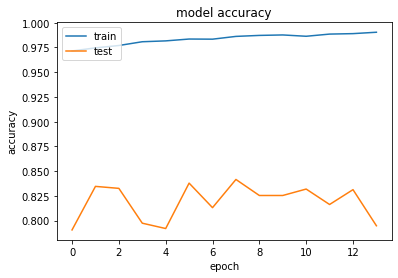

In [ ]:
# summarize history for accuracy
plt.plot(history34.history['accuracy'])
plt.plot(history34.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
hist34_df = pd.DataFrame(history34.history)
hist34_df

loss  accuracy  val_loss  val_accuracy
0   0.072685  0.971467  0.827065        0.7906
1   0.069782  0.974600  0.576494        0.8346
2   0.063213  0.977000  0.660099        0.8326
3   0.055226  0.980800  0.774963        0.7974
4   0.050628  0.981667  0.944879        0.7920
5   0.045400  0.983533  0.710527        0.8379
6   0.046990  0.983400  0.751264        0.8131
7   0.039033  0.986200  0.664851        0.8416
8   0.037713  0.987200  0.774272        0.8254
9   0.032914  0.987667  0.877999        0.8254
10  0.035091  0.986333  0.826904        0.8319
11  0.031051  0.988533  0.772946        0.8163
12  0.031284  0.989000  0.716559        0.8313
13  0.029111  0.990400  0.959999        0.7948

In [ ]:
hist34_df.to_csv("/content/gdrive/MyDrive/Cloud Research/dataset/Training Models/resnet34/history/dog_cat_resnet34_after_spilt.csv")

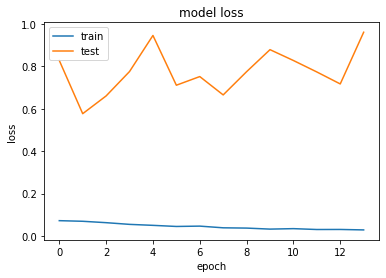

In [ ]:
# summarize history for loss
plt.plot(history34.history['loss'])
plt.plot(history34.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# !tensorboard --logdir=logs --load_fast=true --bind_all

TensorBoard 2.8.0 at http://3591c3263478:6006/ (Press CTRL+C to quit)
Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/util.py", line 320, in _exit_function
    def _exit_function(info=info, debug=debug, _run_finalizers=_run_finalizers,
KeyboardInterrupt


In [ ]:
hist101_df = pd.DataFrame(history34.history)
hist101_df

loss  accuracy  val_loss  val_accuracy
0   0.072685  0.971467  0.827065        0.7906
1   0.069782  0.974600  0.576494        0.8346
2   0.063213  0.977000  0.660099        0.8326
3   0.055226  0.980800  0.774963        0.7974
4   0.050628  0.981667  0.944879        0.7920
5   0.045400  0.983533  0.710527        0.8379
6   0.046990  0.983400  0.751264        0.8131
7   0.039033  0.986200  0.664851        0.8416
8   0.037713  0.987200  0.774272        0.8254
9   0.032914  0.987667  0.877999        0.8254
10  0.035091  0.986333  0.826904        0.8319
11  0.031051  0.988533  0.772946        0.8163
12  0.031284  0.989000  0.716559        0.8313
13  0.029111  0.990400  0.959999        0.7948

In [ ]:
import plotly.express as px

fig = px.line(hist101_df,y=["accuracy",'val_accuracy'])
fig.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
hist34_df = pd.read_csv('/content/drive/MyDrive/Cloud Research/model/history/dog_cat_resnet34_after_spilt.csv')

In [ ]:
import plotly.express as px

fig = px.line(hist34_df,y=["accuracy",'val_accuracy','loss','val_loss'])
fig.show()

In [ ]:
import plotly.express as px

fig = px.line(hist34_df,y=["accuracy",'val_accuracy'])
fig.show()

In [ ]:
import plotly.express as px

fig = px.line(hist34_df,y=['loss','val_loss'])
fig.show()

In [ ]:
# test_path = 'test1'
# unzipTestData()
# commonTestList = createCommonList(test_path)
# final_test_list = createFinalList(commonTestList, test_path)
# test_df = createDataFrame(final_test_list)
# plotAnyImage(test_df, 5)
# generalInfoAboutDAtaFrame(test_df)
# test_data, test_labels = imagesAndLabelsFormater(test_df)
# test_data = convertIntoArray(test_data)
# test_labels = custom_data_label_encoder(test_labels)

In [ ]:
# test_data.shape

(12500, 224, 224, 3)

In [ ]:
# test_labels.shape

(12500, 12500)

In [ ]:
old_model = load_model('/content/gdrive/MyDrive/Cloud Research/model/dog_cat_resnet34_after_spilt.h5')

In [ ]:
def predict_the_score(path):
  # img = image.load_img(path, target_size=(224,224))
  # img2 = image.img_to_array(img)
  img2 = np.expand_dims(path, axis=0)
  img2 = preprocess_input(img2)
  ans = old_model101.predict(img2)
  return np.round(ans)
  # return ans

In [ ]:
Y[1]

array([1., 0.])

In [ ]:
predict_the_score(images_test[1])

array([[0., 1.]], dtype=float32)

In [ ]:
# test_ans = []
# for n, i in enumerate(final_test_list):
#   print(f"[INFO] Image number {n} started.")
#   label = i[0]
#   prediction = predict_the_score(i[1])
#   test_ans.append((label, prediction))
# print(f"[DONE] Prediction completed\nTotal images predicted: {len(test_ans)}")

In [ ]:
test_ans = []
for i in range(len(images_test)):
  print(f"[INFO] Image number {i} started.")
  label = labels_test[i]
  prediction = predict_the_score(images_test[i])
  test_ans.append((label, prediction))
print(f"[DONE] Prediction completed\nTotal images predicted: {len(test_ans)}")

In [ ]:
# predict_the_score(final_test_list[0][1])

In [ ]:
Y[0]

array([1., 0.])

In [ ]:
test_ans[0]

('dog', array([[1., 0.]], dtype=float32))

In [ ]:
test_ans[0][0][0]

'd'

In [ ]:
'Dog' if test_ans[0][0][0] else 'Cat'

'Dog'

In [ ]:
len(test_ans)

10000

In [ ]:
final_test_list = test_df['image']

In [ ]:
final_test_list[0]

'train/dog.8238.jpg'

In [ ]:
final_test_ans = []
for i in range(len(test_ans)):
  if(test_ans[i][1][0][0]):
    final_test_ans.append((f'{final_test_list[i]}', 'cat', test_ans[i][0]))
  else:
    print(i)
    final_test_ans.append((f'{final_test_list[i]}', 'dog', test_ans[i][0]))


In [ ]:
final_test_df = pd.DataFrame(final_test_ans, columns=['index', 'prediction', 'actual'])


In [ ]:
final_test_df = final_test_df.sort_values(by='index', ascending=True)
final_test_df.head()

index prediction actual
9332     train/cat.10.jpg        dog    cat
6928   train/cat.1000.jpg        cat    cat
6571  train/cat.10001.jpg        dog    cat
5824  train/cat.10005.jpg        cat    cat
6310  train/cat.10007.jpg        dog    cat

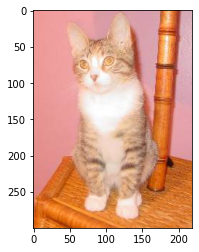

In [ ]:
plt.imshow(mpimg.imread('train/cat.10007.jpg'))

In [ ]:
final_test_df.to_csv('gdrive/My Drive/Cloud Research/Test DF/resnet101/final_test_df_101.csv')

In [ ]:
final_test_ans[0]

('train/dog.6483.jpg', 'dog', 'dog')

In [ ]:
# new list of top 9 images



In [ ]:
# Importing the PIL library
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont


# for i in range(len(final_test_ans)):
#   print(f"[INFO] Processing image number {i}")
#   # Open an Image
#   img = Image.open(final_test_ans[i][0])

#   # Call draw Method to add 2D graphics in an image
#   I1 = ImageDraw.Draw(img)

#   myFont = ImageFont.truetype('Montserrat-Bold.ttf', 30)


#   # Add Text to an image
#   I1.text((10, 10), final_test_ans[i][1], font = myFont, fill=(255, 0, 0),)

#   # Display edited image
#   img.show()

#   save_path = f"Resnet34/{final_test_ans[i][0]}"
#   # Save the edited image
#   img.save(save_path)


In [ ]:
import os
len(os.listdir("Resnet50/test1"))

12500

In [ ]:
!zip -r /content/testImages.zip /content/Resnet50/test1

In [ ]:
from google.colab import files
files.download("/content/testImages.zip")

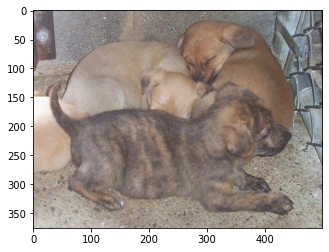

In [ ]:
plt.imshow(mpimg.imread(final_test_ans[5][0]))

In [ ]:
# img = image.load_img(final_train_list[4][1], target_size=(224,224))
# img2 = image.img_to_array(img)
# img2 = np.expand_dims(img2, axis=0)
# img2 = preprocess_input(img2)

# plt.imshow(mpimg.imread(final_train_list[4][1]))

In [ ]:
# test_image = np.array(img2)
# model.predict(test_image)
# img.shape

In [ ]:
# ans = model.predict(img2)
# np.round(ans)

In [ ]:
# 9.9999988e-01

In [ ]:
# np.around(1.4127232e-07)

In [ ]:
# model = Model()

In [ ]:
# get_acc = old_model.history['accuracy']
# value_acc = old_model.history['val_accuracy']
# get_loss = old_model.history['loss']
# validation_loss = old_model.history['val_loss']

In [ ]:
# img = image.load_img('train/cat.1.jpg', target_size=(224,224))
# img2 = image.img_to_array(img)
# img2 = np.expand_dims(img2, axis=0)
# img2 = preprocess_input(img2)

# plt.imshow(mpimg.imread('train/cat.1.jpg'))
# ans = model.predict(img2)
# np.around(ans)

In [ ]:
# test_path = 'test1'
# train_path = 'train'

# Experiments

In [ ]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
from google.colab import drive

print("[INFO] Mounting google drive to this notebook.")
drive.mount('/content/gdrive')
print("\n-------------------------------\n[DONE] G-Drive Mount Successful\n-------------------------------")

[INFO] Mounting google drive to this notebook.
Mounted at /content/gdrive

-------------------------------
[DONE] G-Drive Mount Successful
-------------------------------


In [ ]:
print("[INFO] Unzipping the dataset from google drive.")
%time !unzip -q gdrive/My\ Drive/Cloud\ Research/dataset/data.zip
print("-------------------------------\n[DONE] Unzip Successful\n-------------------------------")


[INFO] Unzipping the dataset from google drive.
CPU times: user 74 ms, sys: 18.1 ms, total: 92.1 ms
Wall time: 10.6 s
-------------------------------
[DONE] Unzip Successful
-------------------------------


In [ ]:
print(f"[INFO] Unzipping Training Data")
%time !unzip -q train.zip
print("-------------------------------\n[DONE] Unzipping Training Data Successful\n-------------------------------")


[INFO] Unzipping Training Data
CPU times: user 44.8 ms, sys: 11.5 ms, total: 56.3 ms
Wall time: 5.75 s
-------------------------------
[DONE] Unzipping Training Data Successful
-------------------------------


In [ ]:

import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
# from IPython.display import svg
from keras.utils.vis_utils import model_to_dot, plot_model

from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow


In [ ]:
test_df = pd.read_csv('/content/gdrive/MyDrive/Cloud Research/train_test_df/test.csv')
# plotAnyImage(test_df, 805)
# generalInfoAboutDAtaFrame(test_df)
images_test, labels_test = imagesAndLabelsFormater(test_df)
images_test = convertIntoArray(images_test)
Y_test = custom_data_label_encoder(labels_test)

## Resnet 34

In [ ]:
old_model34 = load_model('/content/gdrive/MyDrive/Cloud Research/model/Training Models/resnet34/dog_cat_resnet34_after_spilt.h5')

In [ ]:
loss, acc = old_model34.evaluate(images_test, Y_test, verbose=2)
print("Trained model, accuracy: {:5.2f}%".format(100 * acc))

313/313 - 120s - loss: 0.8111 - accuracy: 0.8225 - 120s/epoch - 382ms/step
Trained model, accuracy: 82.25%


In [ ]:
dfFilePath = 'gdrive/My Drive/Cloud Research/Test DF/resnet34/final_test_df_34.csv'

In [ ]:
df34 = pd.read_csv(dfFilePath)

In [ ]:
df34.columns = ['index', 'filePath', 'prediction', 'actual']

In [ ]:
df34.head()

index             filePath prediction actual
0   9332     train/cat.10.jpg        dog    cat
1   6928   train/cat.1000.jpg        cat    cat
2   6571  train/cat.10001.jpg        cat    cat
3   5824  train/cat.10005.jpg        cat    cat
4   6310  train/cat.10007.jpg        cat    cat

In [ ]:
adpc = []
acpd = []
acpc = []
adpd = []
for i in range(len(df34)):
  if df34.prediction[i] != df34.actual[i]:
    if df34.actual[i] == 'dog':
      adpc.append(df34.filePath[i])
    else:
      acpd.append(df34.filePath[i])
  elif df34.prediction[i] == df34.actual[i]:
    if df34.actual[i] == 'dog':
      adpd.append(df34.filePath[i])
    else:
      acpc.append(df34.filePath[i])
print(f'Actual cat but predicted dog: {len(acpd)}\nActual dog but predicted cat: {len(adpc)}\nActual dog but predicted dog: {len(adpd)}\nActual cat but predicted cat: {len(acpc)}\nTotal count: {len(df34)}')

Actual cat but predicted dog: 304
Actual dog but predicted cat: 4252
Actual dog but predicted dog: 748
Actual cat but predicted cat: 4696
Total count: 10000


In [ ]:
acpd[:10][0]

'train/cat.10.jpg'

In [ ]:
adpc[0]

'train/dog.100.jpg'

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plotImage(path):
  plt.imshow(mpimg.imread(path))

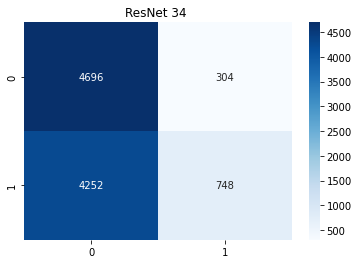

In [ ]:
from sklearn.metrics import confusion_matrix as cm
import seaborn as sns

cm_matrix = cm(df34.actual, df34.prediction, labels=['cat', 'dog'])

ax = sns.heatmap(cm_matrix, annot=True, fmt='0.0f', cmap='Blues')

plt.title('ResNet 34 ')
plt.show()


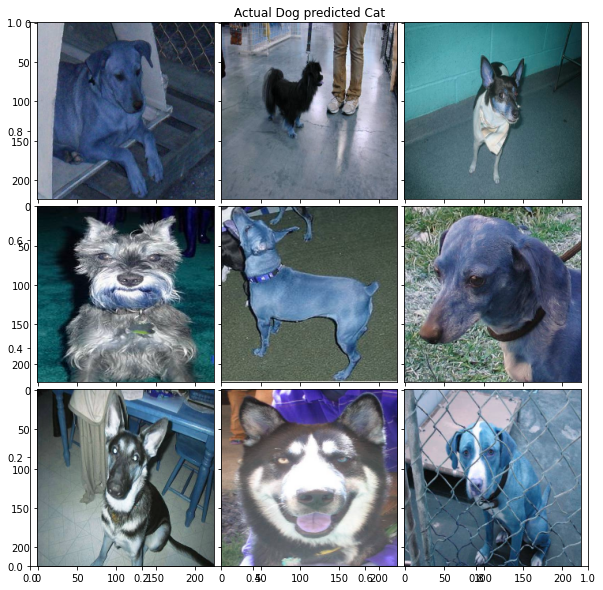

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(10, 10))
plt.title('Actual Dog predicted Cat')
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, adpc[:10]):
    # Iterating over the grid returns the Axes.
    ax.imshow(cv2.resize(cv2.imread(im), (224, 224)))


plt.show()

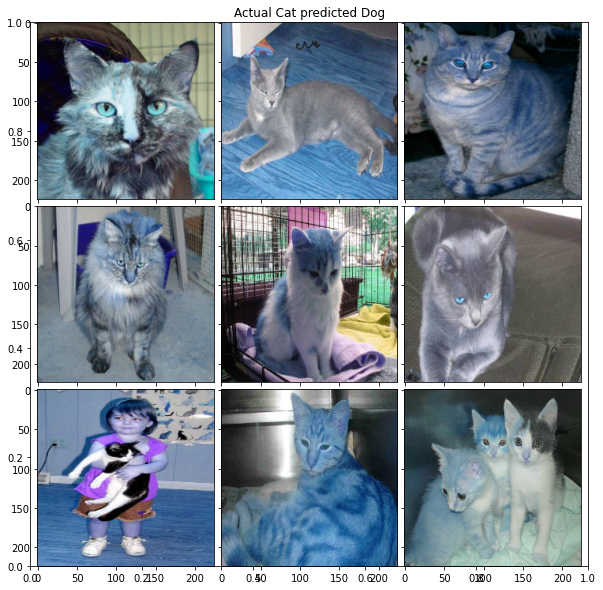

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(10, 10))
plt.title('Actual Cat predicted Dog')
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, acpd[:10]):
    # Iterating over the grid returns the Axes.
    ax.imshow(cv2.resize(cv2.imread(im), (224, 224)))


plt.show()

# Resnet 50


In [ ]:
old_model50 = load_model('/content/gdrive/MyDrive/Cloud Research/model/Training Models/resnet50/dog_cat_resnet50_after_spilt.h5')

In [ ]:
loss, acc = old_model50.evaluate(images_test, Y_test, verbose=2)
print("Trained model, accuracy: {:5.2f}%".format(100 * acc))

313/313 - 31s - loss: 0.3473 - accuracy: 0.9139 - 31s/epoch - 100ms/step
Trained model, accuracy: 91.39%


In [ ]:
dfFilePath = '/content/gdrive/MyDrive/Cloud Research/Test DF/resnet50/final_test_df_50.csv'

In [ ]:
df50 = pd.read_csv(dfFilePath)

In [ ]:
df50.columns = ['index', 'filePath', 'prediction', 'actual']

In [ ]:
df50.head()

index             filePath prediction actual
0   9332     train/cat.10.jpg        cat    cat
1   6928   train/cat.1000.jpg        cat    cat
2   6571  train/cat.10001.jpg        cat    cat
3   5824  train/cat.10005.jpg        cat    cat
4   6310  train/cat.10007.jpg        dog    cat

In [ ]:
adpc = []
acpd = []
acpc = []
adpd = []
for i in range(len(df50)):
  if df50.prediction[i] != df50.actual[i]:
    if df50.actual[i] == 'dog':
      adpc.append(df50.filePath[i])
    else:
      acpd.append(df50.filePath[i])
  elif df50.prediction[i] == df50.actual[i]:
    if df50.actual[i] == 'dog':
      adpd.append(df50.filePath[i])
    else:
      acpc.append(df50.filePath[i])
print(f'Actual cat but predicted dog: {len(acpd)}\nActual dog but predicted cat: {len(adpc)}\nActual dog but predicted dog: {len(adpd)}\nActual cat but predicted cat: {len(acpc)}\nTotal count: {len(df50)}')

Actual cat but predicted dog: 286
Actual dog but predicted cat: 2812
Actual dog but predicted dog: 2188
Actual cat but predicted cat: 4714
Total count: 10000


In [ ]:
acpd[0]

'train/cat.10007.jpg'

In [ ]:
adpc[0]

'train/dog.100.jpg'

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plotImage(path):
  plt.imshow(mpimg.imread(path))

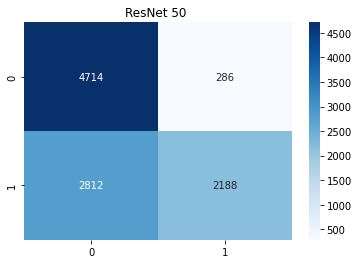

In [ ]:
from sklearn.metrics import confusion_matrix as cm
import seaborn as sns

cm_matrix = cm(df50.actual, df50.prediction, labels=['cat', 'dog'])

ax = sns.heatmap(cm_matrix, annot=True, fmt='0.0f', cmap='Blues')

plt.title('ResNet 50 ')
plt.show()


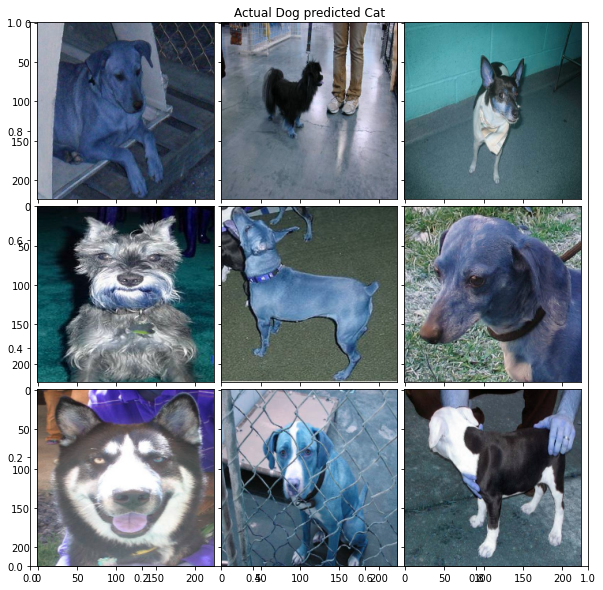

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(10, 10))
plt.title('Actual Dog predicted Cat')
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, adpc[:10]):
    # Iterating over the grid returns the Axes.
    ax.imshow(cv2.resize(cv2.imread(im), (224, 224)))


plt.show()

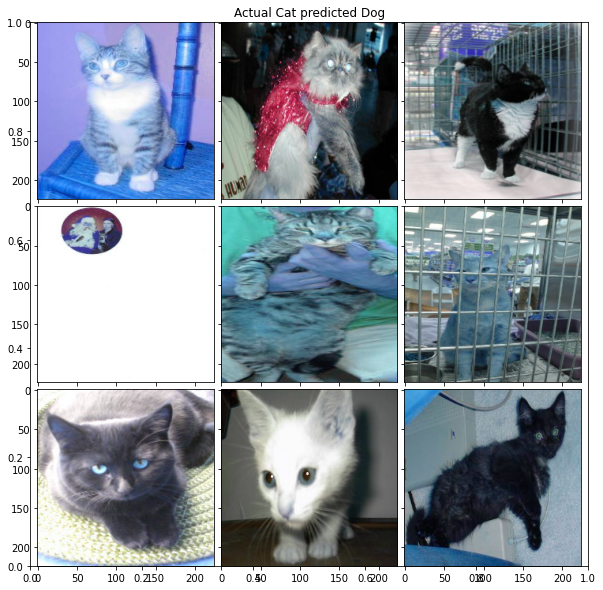

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(10, 10))
plt.title('Actual Cat predicted Dog')
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, acpd[:10]):
    # Iterating over the grid returns the Axes.
    ax.imshow(cv2.resize(cv2.imread(im), (224, 224)))


plt.show()

# Resnet 101

In [ ]:
old_model101 = load_model('/content/gdrive/MyDrive/Cloud Research/model/Training Models/resnet101/dog_cat_resnet101_after_spilt.h5')

In [ ]:
loss, acc = old_model101.evaluate(images_test, Y_test, verbose=2)
print("Trained model, accuracy: {:5.2f}%".format(100 * acc))

313/313 - 55s - loss: 0.1939 - accuracy: 0.9489 - 55s/epoch - 175ms/step
Trained model, accuracy: 94.89%


In [ ]:
dfFilePath = '/content/gdrive/MyDrive/Cloud Research/Test DF/resnet101/final_test_df_101.csv'

In [ ]:
df101 = pd.read_csv(dfFilePath)

In [ ]:
df101.columns = ['index', 'filePath', 'prediction', 'actual']

In [ ]:
df101.head()

index             filePath prediction actual
0   9332     train/cat.10.jpg        dog    cat
1   6928   train/cat.1000.jpg        cat    cat
2   6571  train/cat.10001.jpg        dog    cat
3   5824  train/cat.10005.jpg        cat    cat
4   6310  train/cat.10007.jpg        dog    cat

In [ ]:
adpc = []
acpd = []
acpc = []
adpd = []
for i in range(len(df101)):
  if df101.prediction[i] != df101.actual[i]:
    if df101.actual[i] == 'dog':
      adpc.append(df101.filePath[i])
    else:
      acpd.append(df101.filePath[i])
  elif df101.prediction[i] == df101.actual[i]:
    if df101.actual[i] == 'dog':
      adpd.append(df101.filePath[i])
    else:
      acpc.append(df101.filePath[i])
print(f'Actual cat but predicted dog: {len(acpd)}\nActual dog but predicted cat: {len(adpc)}\nActual dog but predicted dog: {len(adpd)}\nActual cat but predicted cat: {len(acpc)}\nTotal count: {len(df50)}')

Actual cat but predicted dog: 1694
Actual dog but predicted cat: 1858
Actual dog but predicted dog: 3142
Actual cat but predicted cat: 3306
Total count: 10000


In [ ]:
acpd[0]

'train/cat.10.jpg'

In [ ]:
adpc[0]

'train/dog.10010.jpg'

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plotImage(path):
  plt.imshow(mpimg.imread(path))

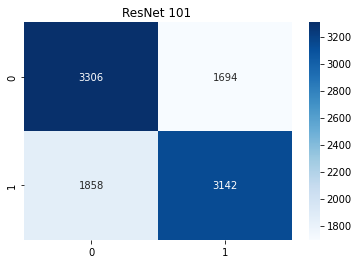

In [ ]:
from sklearn.metrics import confusion_matrix as cm
import seaborn as sns

cm_matrix = cm(df101.actual, df101.prediction, labels=['cat', 'dog'])

ax = sns.heatmap(cm_matrix, annot=True, fmt='0.0f', cmap='Blues')

plt.title('ResNet 101 ')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(10, 10))
plt.title('Actual Dog predicted Cat')
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, adpc[:10]):
    # Iterating over the grid returns the Axes.
    ax.imshow(cv2.resize(cv2.imread(im), (224, 224)))


plt.show()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(10, 10))
plt.title('Actual Cat predicted Dog')
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, acpd[:10]):
    # Iterating over the grid returns the Axes.
    ax.imshow(cv2.resize(cv2.imread(im), (224, 224)))


plt.show()

# Resnet 152

In [ ]:
old_model152 = load_model('/content/gdrive/MyDrive/Cloud Research/dog_cat_resnet152_after_spilt_1.h5')

In [ ]:
loss, acc = old_model152.evaluate(images_test, Y_test, verbose=2)
print("Trained model, accuracy: {:5.2f}%".format(100 * acc))

313/313 - 78s - loss: 0.1849 - accuracy: 0.9529 - 78s/epoch - 249ms/step
Trained model, accuracy: 95.29%


In [ ]:
dfFilePath = '/content/gdrive/MyDrive/Cloud Research/final_test_df_152.csv'

In [ ]:
df152 = pd.read_csv(dfFilePath)

In [ ]:
df152.columns = ['index', 'filePath', 'prediction', 'actual']

In [ ]:
df152.head()

index             filePath prediction actual
0   7302     train/cat.10.jpg        cat    cat
1   8320   train/cat.1000.jpg        cat    cat
2   8150  train/cat.10002.jpg        cat    cat
3   8533  train/cat.10006.jpg        cat    cat
4   5836  train/cat.10010.jpg        cat    cat

In [ ]:
adpc = []
acpd = []
acpc = []
adpd = []
for i in range(len(df152)):
  if df152.prediction[i] != df152.actual[i]:
    if df152.actual[i] == 'dog':
      adpc.append(df152.filePath[i])
    else:
      acpd.append(df152.filePath[i])
  elif df152.prediction[i] == df152.actual[i]:
    if df152.actual[i] == 'dog':
      adpd.append(df152.filePath[i])
    else:
      acpc.append(df152.filePath[i])
print(f'Actual cat but predicted dog: {len(acpd)}\nActual dog but predicted cat: {len(adpc)}\nActual dog but predicted dog: {len(adpd)}\nActual cat but predicted cat: {len(acpc)}\nTotal count: {len(df152)}')

Actual cat but predicted dog: 581
Actual dog but predicted cat: 2301
Actual dog but predicted dog: 2699
Actual cat but predicted cat: 4353
Total count: 9934


In [ ]:
acpd[0]

'train/cat.10013.jpg'

In [ ]:
adpc[0]

'train/dog.10006.jpg'

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plotImage(path):
  plt.imshow(mpimg.imread(path))

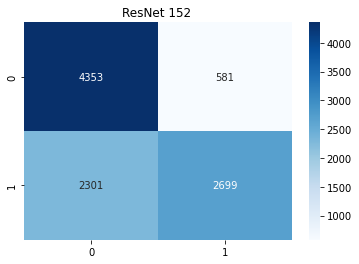

In [ ]:
from sklearn.metrics import confusion_matrix as cm
import seaborn as sns

cm_matrix = cm(df152.actual, df152.prediction, labels=['cat', 'dog'])

ax = sns.heatmap(cm_matrix, annot=True, fmt='0.0f', cmap='Blues')

plt.title('ResNet 152 ')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(10, 10))
plt.title('Actual Dog predicted Cat')
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, adpc[:10]):
    # Iterating over the grid returns the Axes.
    ax.imshow(cv2.resize(cv2.imread(im), (224, 224)))


plt.show()

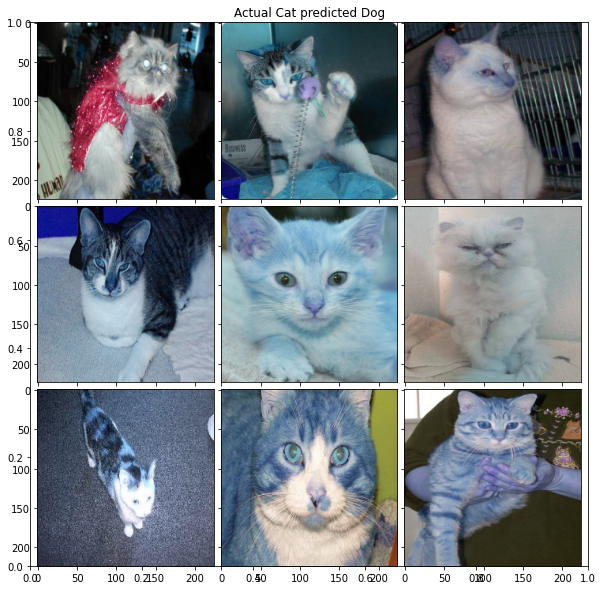

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(10, 10))
plt.title('Actual Cat predicted Dog')
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, acpd[:10]):
    # Iterating over the grid returns the Axes.
    ax.imshow(cv2.resize(cv2.imread(im), (224, 224)))


plt.show()

In [ ]:
import pandas as pd

dfFilePath = 'gdrive/My Drive/Cloud Research/final_test_df_152.csv'
df34 = pd.read_csv(dfFilePath)

from sklearn import metrics
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(df34.actual, df34.prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Cat', 'Dog'])

cm_display.plot()
plt.title("Resnet 152")
plt.show()


In [ ]:
hist152_df = pd.read_csv('/content/gdrive/MyDrive/Cloud Research/dog_cat_resnet152_after_spilt.csv')

In [ ]:
import plotly.express as px

fig = px.line(hist152_df,y=["accuracy",'val_accuracy','loss','val_loss'])
fig.show()